**Image Watermarking**

In [1]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

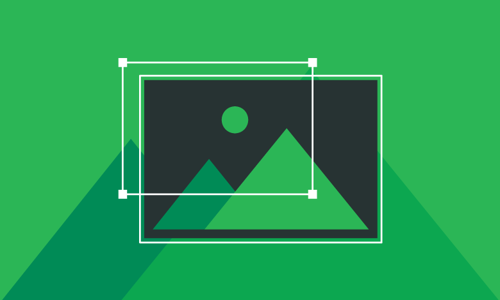

In [3]:
# Reading image form url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

<ipython-input-9-bc431049f60b>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_logo = logo.resize((250,80), Image.ANTIALIAS)


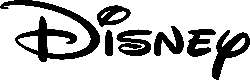

In [9]:
# Reading logo form url
logo = Image.open('/content/logo.png')
resized_logo = logo.resize((250,80), Image.ANTIALIAS)
resized_logo.save('/content/resized_logo.png') # Disney logo from Google
resized_logo

Image as Watermark

In [14]:
#image_logow = np.array(image_logow.convert('RGB')) # convert img to rgb image and convert to numpy
h_image, w_image, _ = image_logow.shape # shape of image, channel not required
logo = np.array(resized_logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape
print(h_image)
print(w_image)
print(h_logo)
print(w_logo)

300
500
80
250


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
# Get the center of the original. It's the location where the watermark will be placed
center_y = int(h_image / 2)
center_x = int(w_image / 2)
print(center_y)
print(center_x)
top_y = center_y - int(h_logo / 2)
print(top_y)
left_x = center_x - int(w_logo / 2)
print(left_x)
bottom_y = top_y + h_logo
print(bottom_y)
right_x = left_x + w_logo
print(right_x)

150
250
110
125
190
375


In [15]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

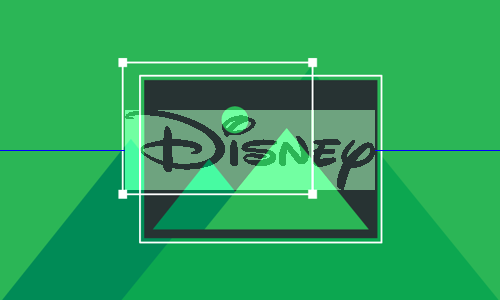

In [16]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

Text as a Watermark

In [35]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Disney', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.75,
            color=(255,0,0), thickness=1, lineType=cv2.LINE_4);

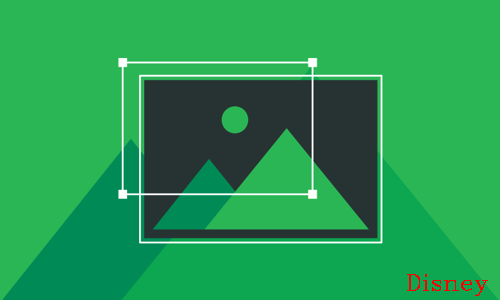

In [36]:
# Plotting text watermark image
text_img = Image.fromarray(image_text, 'RGB')
text_img